In [1]:
import pandas as pd
import altair as alt
from vega_datasets import data

In [2]:
colleges = pd.read_csv("../data/processed/colleges_in_US.csv")
colleges.head()

,UnitID,Institution Name,FIPS state,Sector,Size,Institution (entity) name,Address,City,State abbreviation,FIPS county,County name,Longitude,Latitude,Undergraduate enrollment,Graduate enrollment,Students receiving a PhD,Students receiving a MA,Students receiving a BA,Students receiving an AA
0,177834,A T Still University of Health Sciences,29,PnP,"1,000 - 4,999",A T Still University of Health Sciences,800 W Jefferson,Kirksville,MO,29001,Adair County,-92.589183,40.193648,0.0,3723.0,763,283,0,0
1,222178,Abilene Christian University,48,PnP,"5,000 - 9,999",Abilene Christian University,NaN,Abilene,TX,48441,Taylor County,-99.709797,32.468943,3666.0,1479.0,3,256,743,3
2,138558,Abraham Baldwin Agricultural College,13,Public,"1,000 - 4,999",Abraham Baldwin Agricultural College,2802 Moore Hwy,Tifton,GA,13277,Tift County,-83.528281,31.481889,3394.0,0.0,0,0,206,389
3,488031,Abraham Lincoln University,6,PfP,"Under 1,000",Abraham Lincoln University,3530 Wilshire Boulevard Suite 1430,Los Angeles,CA,6037,Los Angeles County,-118.301362,34.061398,30.0,167.0,17,6,2,0
4,172866,Academy College,27,PfP,"Under 1,000",Academy College,1600 W. 82nd Street Suite 100,Bloomington,MN,27053,Hennepin County,-93.299809,44.855722,65.0,0.0,0,0,6,16


In [3]:
colleges_clean = colleges[['Institution Name', 'Longitude', 'Latitude', 'Undergraduate enrollment']].copy()
colleges_clean.fillna(0, inplace = True)
colleges_clean.head()

,Institution Name,Longitude,Latitude,Undergraduate enrollment
0,A T Still University of Health Sciences,-92.589183,40.193648,0.0
1,Abilene Christian University,-99.709797,32.468943,3666.0
2,Abraham Baldwin Agricultural College,-83.528281,31.481889,3394.0
3,Abraham Lincoln University,-118.301362,34.061398,30.0
4,Academy College,-93.299809,44.855722,65.0


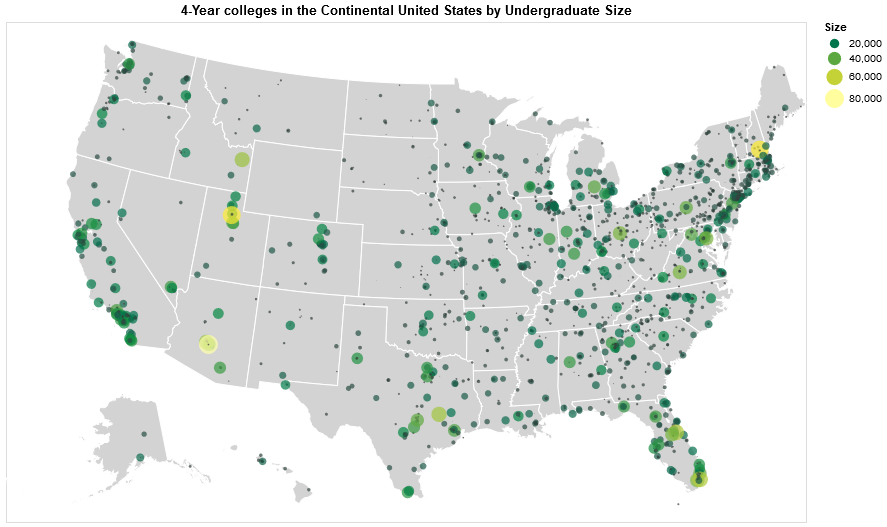

In [4]:
states = alt.topo_feature(data.us_10m.url, feature='states')

# US states background
background = alt.Chart(states).mark_geoshape(
    fill='lightgray',
    stroke='white'
).properties(
    width=800,
    height=500
).project('albersUsa')


# airport positions on background
points = alt.Chart(colleges_clean).mark_circle().encode(
    longitude='Longitude:Q',
    latitude='Latitude:Q',
    size=alt.Size('Undergraduate enrollment:Q', title='Size'),
    color=alt.Color('Undergraduate enrollment:Q', scale=alt.Scale(scheme='darkgreen') ),
    tooltip=['Institution Name:N','Undergraduate enrollment:Q']
).properties(
    title='4-Year colleges in the Continental United States by Undergraduate Size'
)

background + points